In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("sampledata/survey_results_public.csv")

In [2]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [3]:
df = df[["Country",  "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,ProfessionalTech,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN,NaN
1,United States of America,DevOps function;Microservices;Automated testin...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,DevOps function;Microservices;Automated testin...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,Automated testing;Continuous integration (CI) ...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,Microservices;Automated testing;Observability ...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [4]:
df = df[df["Salary"].notnull()]
df.head()

,Country,ProfessionalTech,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,DevOps function;Microservices;Automated testin...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,DevOps function;Microservices;Automated testin...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,Automated testing;Continuous integration (CI) ...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,Microservices;Automated testing;Observability ...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,DevOps function;Microservices;Observability to...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48019 entries, 1 to 89171
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           48019 non-null  object 
 1   ProfessionalTech  31726 non-null  object 
 2   EdLevel           48019 non-null  object 
 3   YearsCodePro      47825 non-null  object 
 4   Employment        48007 non-null  object 
 5   Salary            48019 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.6+ MB


In [6]:
df = df.dropna()
df.isnull().sum()

Country             0
ProfessionalTech    0
EdLevel             0
YearsCodePro        0
Employment          0
Salary              0
dtype: int64

In [7]:
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26832 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           26832 non-null  object 
 1   ProfessionalTech  26832 non-null  object 
 2   EdLevel           26832 non-null  object 
 3   YearsCodePro      26832 non-null  object 
 4   Salary            26832 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.2+ MB


In [8]:
df.head()

,Country,ProfessionalTech,EdLevel,YearsCodePro,Salary
1,United States of America,DevOps function;Microservices;Automated testin...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,DevOps function;Microservices;Automated testin...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,Automated testing;Continuous integration (CI) ...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
5,United Kingdom of Great Britain and Northern I...,DevOps function;Microservices;Observability to...,Some college/university study without earning ...,21,96828.0
6,United States of America,Microservices;Automated testing;Continuous int...,Some college/university study without earning ...,3,135000.0


In [9]:
df['Country'].value_counts()

United States of America                                7123
Germany                                                 2210
United Kingdom of Great Britain and Northern Ireland    2049
India                                                   1255
Canada                                                  1245
                                                        ... 
Namibia                                                    1
Malawi                                                     1
Guinea-Bissau                                              1
Gabon                                                      1
Antigua and Barbuda                                        1
Name: Country, Length: 158, dtype: int64

In [10]:
def shorten_catergories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

country_map = shorten_catergories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                                                   7716
United States of America                                7123
Germany                                                 2210
United Kingdom of Great Britain and Northern Ireland    2049
India                                                   1255
Canada                                                  1245
France                                                   910
Brazil                                                   706
Spain                                                    655
Netherlands                                              652
Australia                                                646
Italy                                                    586
Sweden                                                   548
Poland                                                   531
Name: Country, dtype: int64

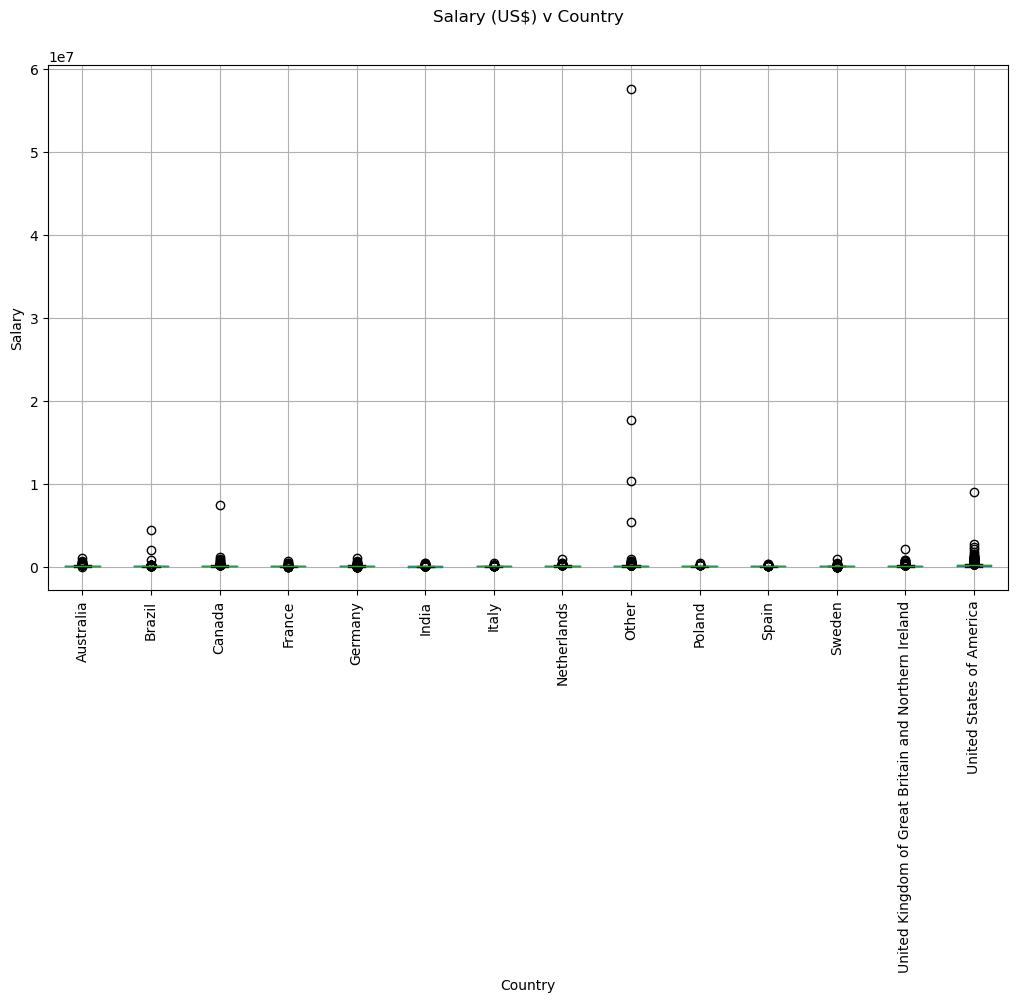

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [12]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

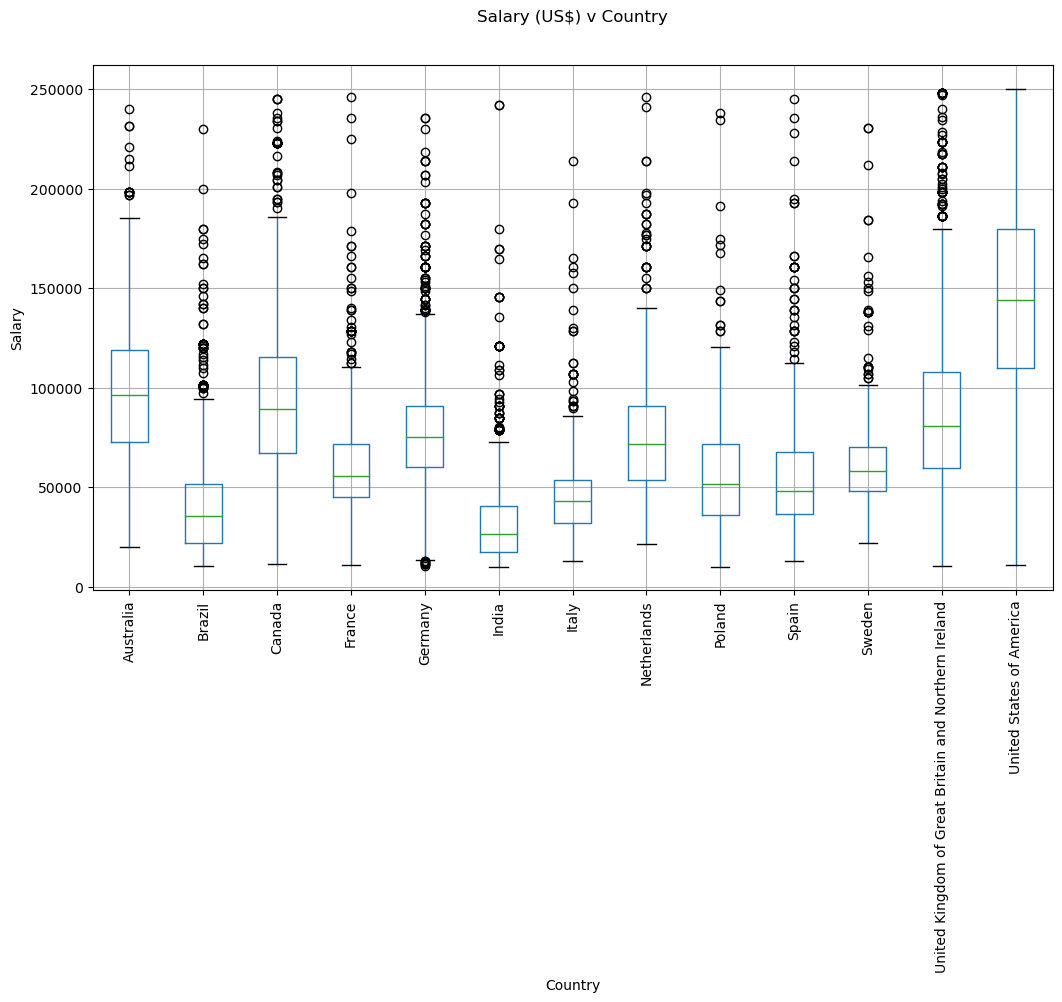

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [14]:
df["YearsCodePro"].unique()

array(['23', '7', '21', '3', '9', 'Less than 1 year', '10', '6', '14',
       '5', '2', '15', '13', '25', '12', '18', '24', '19', '4', '8', '17',
       '38', '29', '22', '1', '20', '11', '27', '28', '16', '31', '30',
       '26', '36', '33', '34', '40', '32', '42', '35', '37', '45', '41',
       '44', '43', '39', '46', 'More than 50 years', '49', '48', '50',
       '47'], dtype=object)

In [15]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [16]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Primary/elementary school'], dtype=object)

In [17]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Associate degree' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [20]:
df['EdLevel'].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

array([0, 1, 2, 3])

In [22]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([12, 11,  7,  4,  3,  9,  6,  2,  1,  5, 10,  8,  0])

In [24]:
X = df.drop("Salary", axis=1)
y = df["Salary"]
X

,Country,ProfessionalTech,EdLevel,YearsCodePro
2,12,3,0,23.0
3,12,1,0,7.0
5,11,3,1,21.0
6,12,8,1,3.0
7,12,14,0,3.0
...,...,...,...,...
89154,12,4,0,8.0
89156,12,1,0,8.0
89162,1,1,2,24.0
89167,5,1,0,2.0


In [25]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [26]:
y_pred = linear_reg.predict(X)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [28]:
error

45513.09968621061

In [29]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [30]:
y_pred = dec_tree_reg.predict(X)

In [31]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$29,313.76


In [32]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [33]:
y_pred = random_forest_reg.predict(X)

In [34]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$29,787.89


In [35]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [36]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$33,732.17


In [37]:
X

,Country,ProfessionalTech,EdLevel,YearsCodePro
2,12,3,0,23.0
3,12,1,0,7.0
5,11,3,1,21.0
6,12,8,1,3.0
7,12,14,0,3.0
...,...,...,...,...
89154,12,4,0,8.0
89156,12,1,0,8.0
89162,1,1,2,24.0
89167,5,1,0,2.0


In [38]:
# country, edlevel, yearscode
X = np.array([['United States of America', 'Master’s degree', 15 ]])
X

array([['United States of America', 'DevOps function;Microservices',
        'Master’s degree', '15']], dtype='<U29')

In [39]:
X[:, 0] =le_country.transform(X[:,0])
X[:, 1] =le_education.transform(X[:,1])
X= X.astype(float)
X

ValueError: y contains previously unseen labels: 'DevOps function;Microservices'

In [ ]:
import pickle

In [ ]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [ ]:
y_pred = regressor_loaded.predict(X)
y_pred